In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [10]:
import cv2
import matplotlib.pyplot as plt

In [12]:
image1 = '/kaggle/input/brain-image-segementation/TCGA_CS_4941_19960909_1.tif'
image2 = '/kaggle/input/brain-image-segementation/TCGA_CS_4941_19960909_10.tif'


In [13]:
# cv2, matploitlib, pillow, scikit-image
image1 = cv2.imread(image1, cv2.IMREAD_UNCHANGED)
image2 = cv2.imread(image2, cv2.IMREAD_UNCHANGED)

In [14]:
image1.shape

(256, 256, 3)

In [15]:
image2.shape

(256, 256, 3)

In [16]:
def image_display(image, title = "Brain Image"):
    plt.figure(figsize = (10, 8)) # Canvas area
    if len(image.shape) == 2:
        plt.imshow(image, cmap = "gray")
        
    else:
        plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
        
    plt.title(title)
    plt.axis("off")
    plt.show()

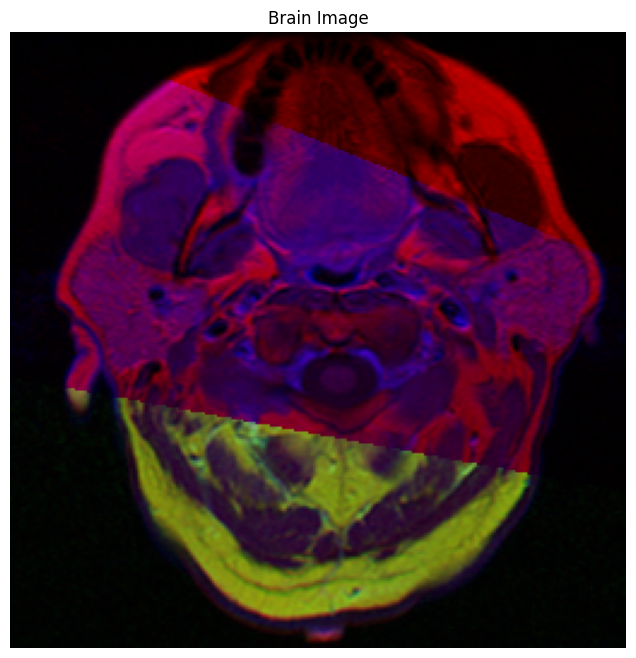

In [17]:
image_display(image1)

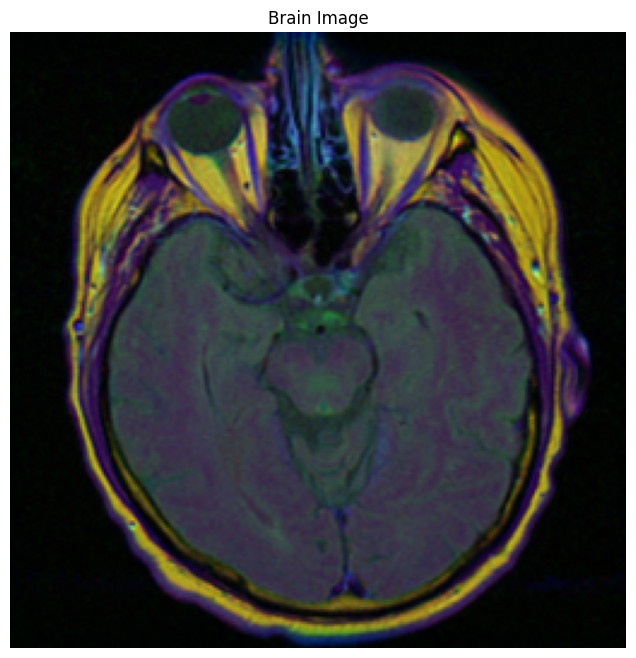

In [18]:
image_display(image2)

In [19]:
image1.dtype

dtype('uint8')

In [20]:
gray_image1 = cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY)
gray_image2 = cv2.cvtColor(image2, cv2.COLOR_BGR2GRAY)

In [22]:
def histogram(image, title):
    plt.figure(figsize = (10, 8))
    plt.hist(image.ravel(), 256, [0, 256])
    plt.title(title)
    plt.xlabel("Image Pixel Intensity")
    plt.ylabel("Pixel Frequency")
    plt.show()
    

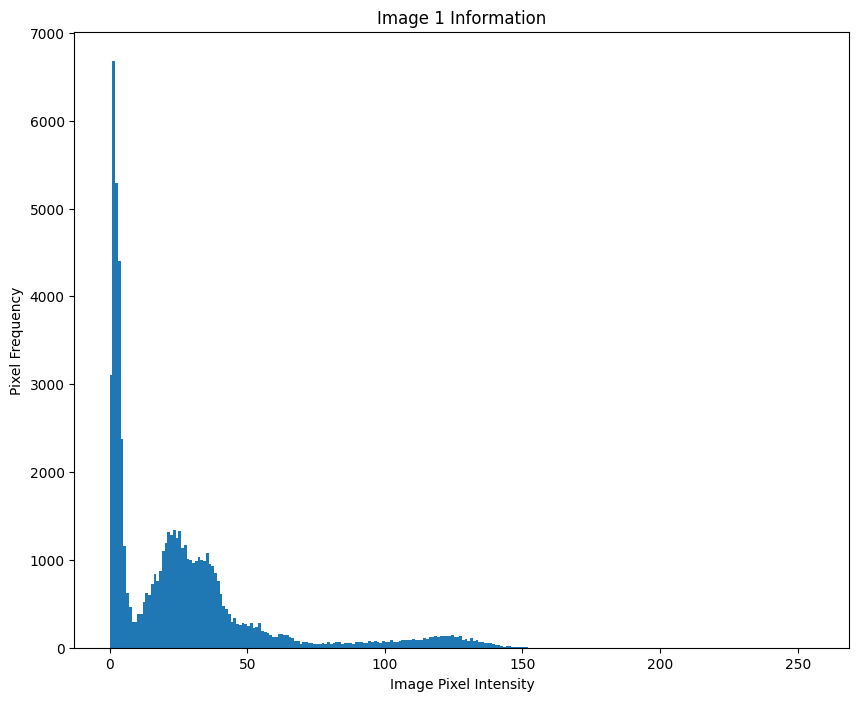

In [23]:
histogram(gray_image1, "Image 1 Information")

In [24]:
import numpy as np
np.max(gray_image1)

158

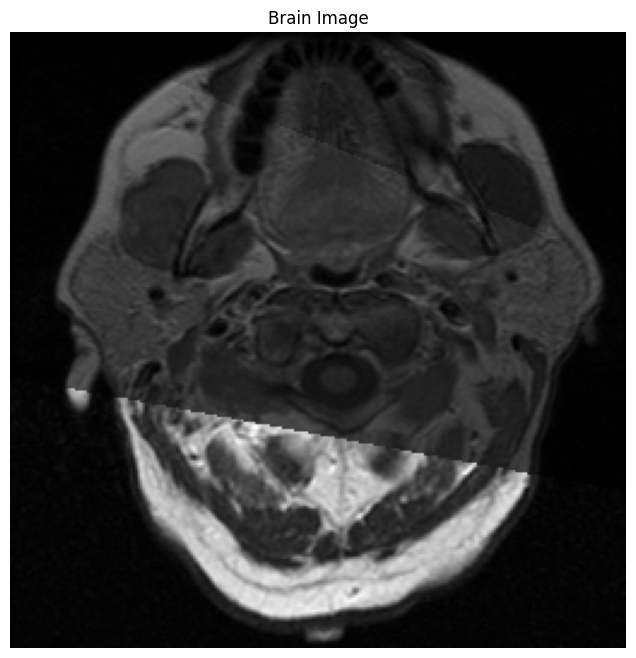

In [25]:
image_display(gray_image1)

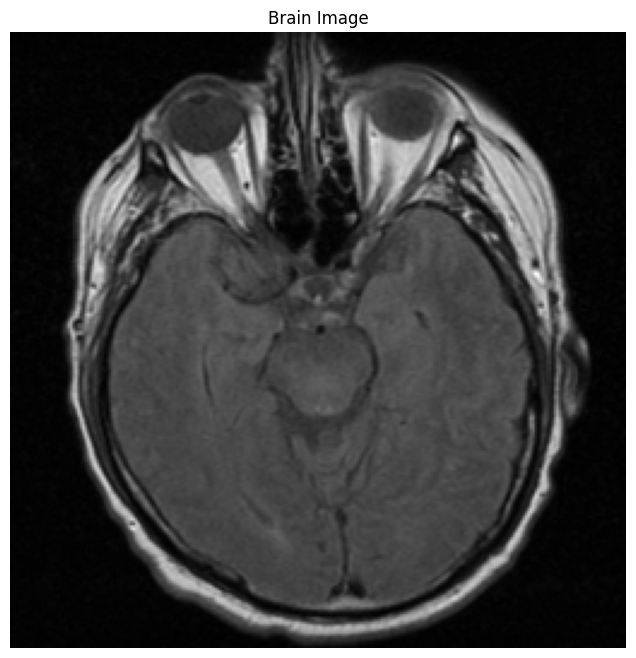

In [26]:
image_display(gray_image2)

In [27]:
gray_image1.shape

(256, 256)

In [29]:
edge_image1 = cv2.Canny(gray_image1, 100, 200) # 100 weak pixel Value  and 200 is the strongest pixel value of the images
edge_image2 = cv2.Canny(gray_image2, 100, 200)

In [31]:
def detect_edge(image, title):
    contours, _ = cv2.findContours(image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    contours_image = cv2.drawContours(np.copy(image), contours, -1, (0, 255, 0), 2)
    image_display(contours_image, title)

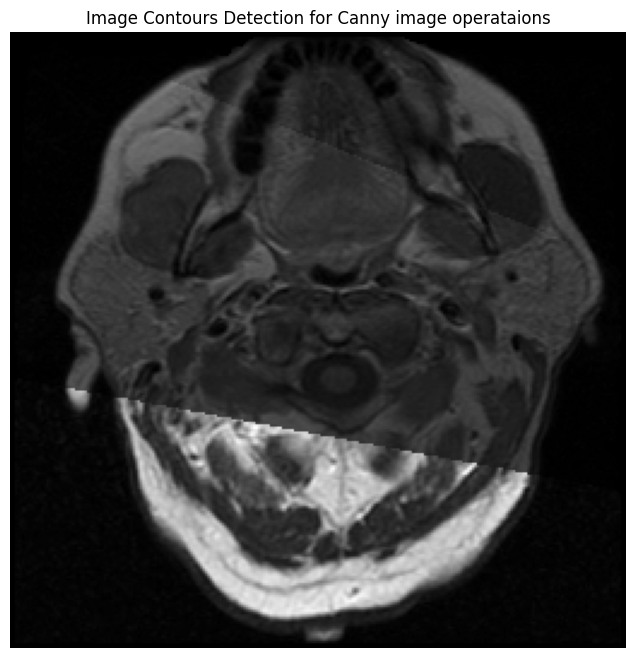

In [34]:
detect_edge(gray_image1, "Image Contours Detection for Canny image operataions")

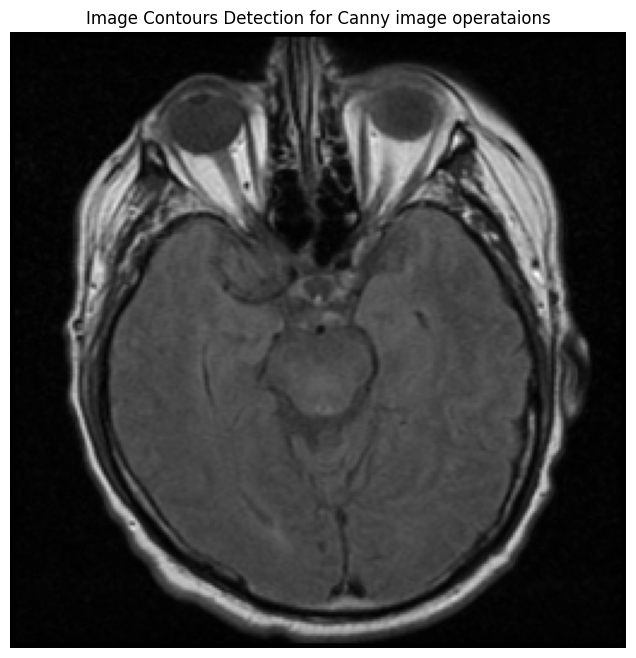

In [35]:
detect_edge(gray_image2, "Image Contours Detection for Canny image operataions")

In [36]:
blur_image1  = cv2.GaussianBlur(gray_image1, (5, 5), 0)
blur_image2 = cv2.GaussianBlur(gray_image2, (5, 5), 0) 

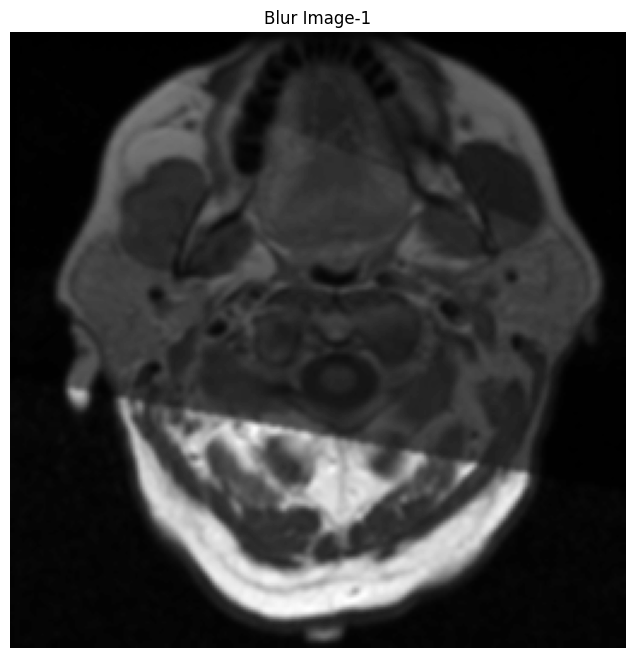

In [39]:
image_display(blur_image1, 'Blur Image-1')

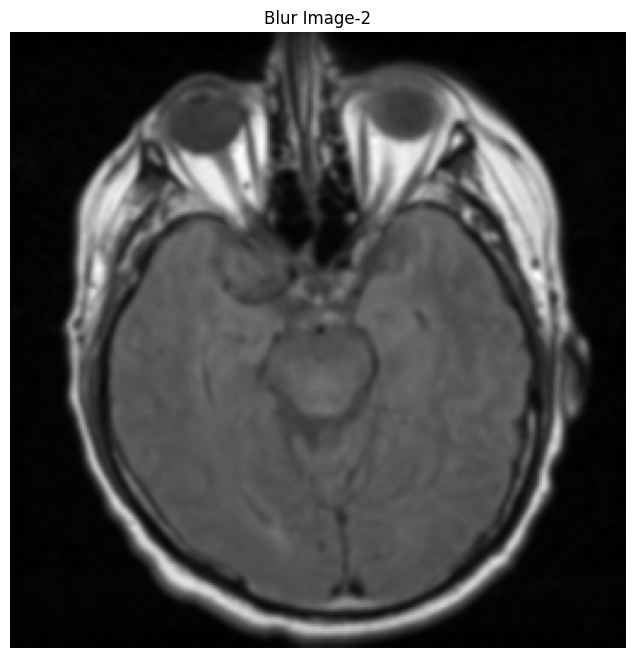

In [40]:
image_display(blur_image2, 'Blur Image-2')

In [41]:
_ , binary_image1 = cv2.threshold(gray_image1,127, 255, cv2.THRESH_BINARY)
_ , binary_image2 = cv2.threshold(gray_image2,127, 255, cv2.THRESH_BINARY)

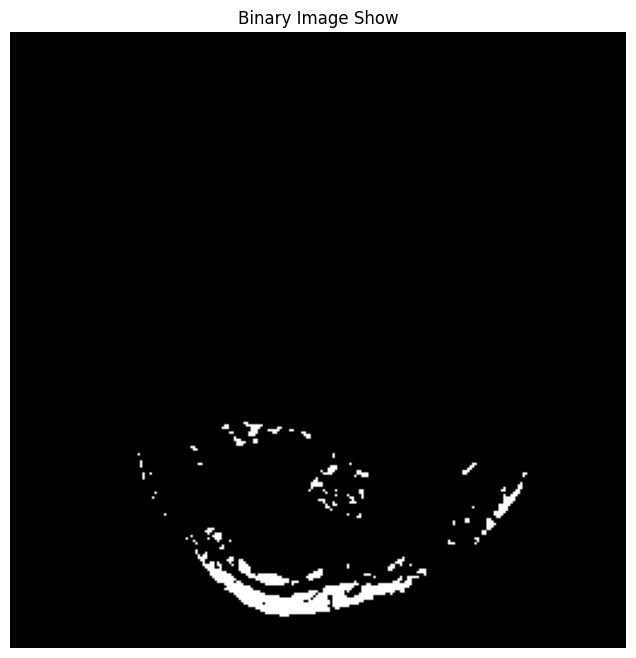

In [42]:
image_display(binary_image1, "Binary Image Show")

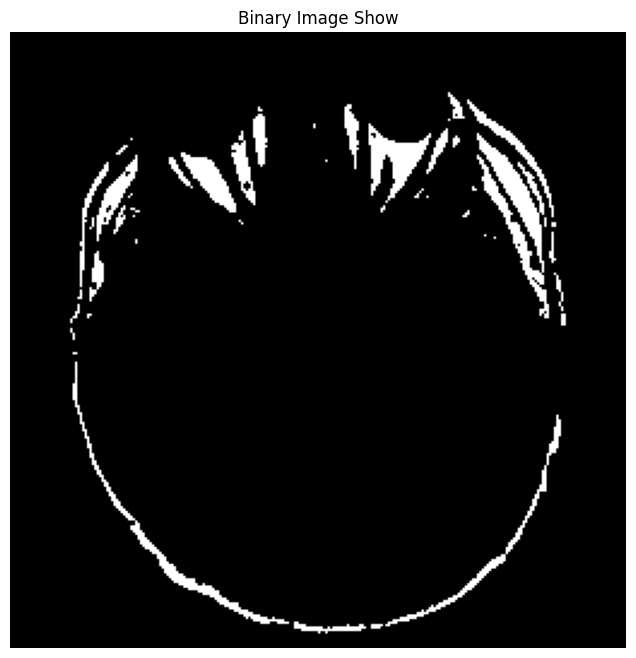

In [43]:
image_display(binary_image2, "Binary Image Show")